In [1]:
# import modules
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

# Import DataFrames

In [2]:
# get raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [3]:
# get lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(5)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
418,GD3 37:0;3 (LCB 18:0;2-H2O),GD3,37,0
3549,GM3 46:0;2 (LCB 18:0;2-H2O),GM3,46,0
874,NAPE 30:10+NH4 (-NAPE (22:5 NH4)),NAPE,30,10
2304,PC 32:6 (LPC),PC,32,6
17,Hex2Cer 28:2;3 (LCB 18:0;2-2H2O),Hex2Cer,28,2


In [5]:
# get experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.sample(5)

,Exp,Mutation
33,SPTLC_B.1,SPTLC
15,CERS2_mg-B.1,CERS2_mg
2,CAS9-B,CAS9
31,SPTLC_A.1,SPTLC
7,CAV_B.1,CAV


# Principal Components Analysis (Transposed)

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
# drop the blank columns and transpose dataframe
samples = df["Sample Name"]
df_dropped = df.drop(["Sample Name", "RAJU-Blank", "RAJU-Blank.1"], axis=1)

df_dropped = df_dropped.T
exps = df_dropped.index

x = df_dropped.values

# for each column, standardize the values
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

((40, 5752), 4.4408920985006264e-17, 1.0)

In [8]:
# create dataframe with standardized values
df_standardized = pd.DataFrame(x, columns=samples)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
CAS9-A,-0.119632,1.767019,-1.638565,0.206113,1.929826,0.169306,2.227004,0.471287,0.400821,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-A.1,-0.553561,1.746037,-2.330926,-0.207008,1.015202,0.228176,-0.659004,-0.757276,-0.763288,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B,-0.879008,1.477073,-0.646596,-0.679147,2.686101,2.670966,-0.659004,0.207133,1.172339,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B.1,-0.752445,2.935033,-2.387777,-0.384060,1.846445,0.127014,2.050161,-0.757276,1.298701,2.624122,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAV_A,-0.036297,0.472543,1.686503,1.386459,-1.123793,0.761665,-0.659004,-0.757276,1.040952,-0.494894,...,3.019255,2.518582,2.754141,3.625649,1.846327,0.151630,2.785081,-0.100456,0.801032,1.933684
CAV_A.1,0.167859,0.239604,1.467892,0.796286,0.593356,0.310385,-0.659004,-0.757276,0.783203,1.409335,...,2.669112,3.887279,2.924216,-0.350245,-0.484760,0.452383,1.882117,0.634059,0.964328,2.275976
CAV_B,-0.969410,-0.468710,0.282205,2.008153,-0.224321,-0.329849,2.049686,-0.757276,-0.763288,-0.494894,...,1.531147,2.266454,2.860438,2.964777,1.740368,2.106525,-0.318859,0.979713,0.650977,1.529318
CAV_B.1,-0.969410,0.290974,0.671246,2.256143,-0.559827,1.425733,0.806763,-0.757276,-0.763288,-0.494894,...,1.239361,1.582106,2.924216,3.316531,1.263555,2.557654,-0.318859,0.893300,0.425893,1.430000
CAVIN_A,1.947901,-0.928126,0.777443,1.150389,-0.557601,0.745717,-0.659004,-0.757276,1.040952,0.929145,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAVIN_A.1,0.193994,-0.226649,-0.553325,0.029061,-0.563991,-0.949952,0.258598,1.358562,1.291696,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,1.210576,1.003763,2.446470,1.238954,-0.593602,1.779386


In [9]:
# do PCA
from sklearn.decomposition import PCA
pca_lipids = PCA(n_components=10)
principal_components = pca_lipids.fit_transform(x)

In [14]:
# create df with pca values

# create list of columns
pcs = []
for i in range(1,11):
    pcs.append('principal component ' + str(i))
# print(pcs)

# create df
df_pca = pd.DataFrame(principal_components, columns=pcs)
df_pca["Exp"] = exps
df_pca = df_pca.merge(df_exps, on='Exp')
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Exp,Mutation
0,39.566811,-8.770011,45.647534,-14.341679,-10.608655,-0.452075,-7.943448,-3.197370,4.209663,6.124459,CAS9-A,CAS9
1,43.875202,-7.850788,44.609864,-14.863754,-11.682024,-0.956959,-12.541508,-16.198019,59.235981,4.137655,CAS9-A.1,CAS9
2,46.298671,-12.131243,42.704936,-36.772322,-22.145514,-0.936623,1.514704,-0.163538,-44.490118,0.079130,CAS9-B,CAS9
3,31.880063,-9.547886,29.136121,-24.551046,-9.254937,-4.809909,-1.448961,6.408814,-16.731694,-2.498632,CAS9-B.1,CAS9
4,-12.407980,-12.403030,-6.039576,-5.788937,-9.811625,20.244688,28.096788,17.902388,7.215034,-11.132609,CAV_A,CAV
5,-15.177652,-13.248007,-6.113451,-3.688627,-7.908200,19.287808,26.377533,11.790323,8.744933,-7.795625,CAV_A.1,CAV
6,-16.684384,-38.531434,27.769653,53.049127,0.590535,28.737986,-2.625674,-15.232699,-10.287822,7.498355,CAV_B,CAV
7,-16.335721,-39.197840,26.248975,51.579896,-1.705924,27.599081,-2.202161,-2.885450,-5.605858,3.360615,CAV_B.1,CAV
8,10.119911,14.382800,-2.461254,-1.181593,-4.094803,14.978089,20.158993,2.593198,5.577702,9.049075,CAVIN_A,CAVIN
9,9.770594,12.447053,-4.186300,1.228716,0.033247,12.682356,22.063186,4.406676,5.327742,12.920082,CAVIN_A.1,CAVIN


Explained variation per principal component: [0.12376561 0.08687938 0.07511378 0.06122986 0.04819859 0.04045763
 0.03538086 0.02931636 0.02807664 0.02657036]


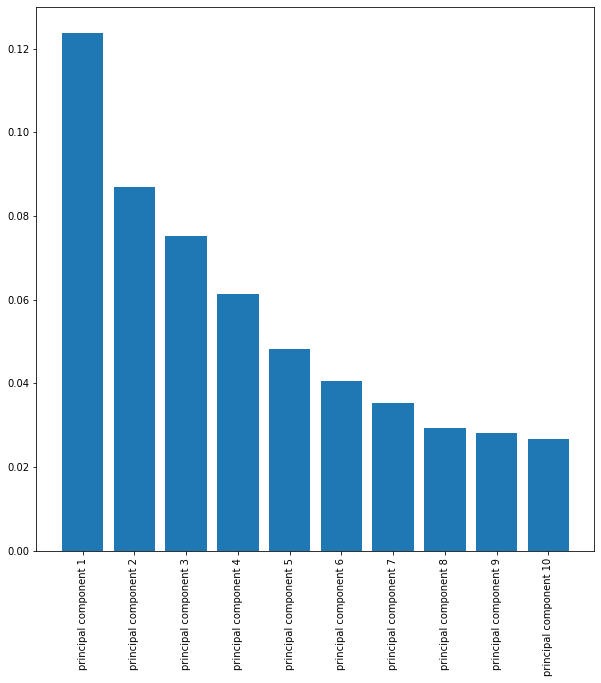

In [15]:
# find explained variance
explained_variance = pca_lipids.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

plt.figure(figsize=(10,10))
plt.bar(
    x=pcs,
    height=explained_variance
)
plt.ylabel('explained variance')
plt.xticks(rotation=90)
plt.show()

In [16]:
# which features contribute to the components. it has shape (n_components, n_features)
components_df = pd.DataFrame(pca_lipids.components_, columns=samples, index=pcs)
components_df

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
principal component 1,0.011029,0.010973,-0.006251,0.002271,0.018211,0.008823,-0.004052,-0.013699,-0.009033,-0.004978,...,-0.013825,-0.008054,-0.007744,-0.007135,0.003141,0.004335,-0.004584,0.013691,0.015727,0.004501
principal component 2,0.008569,0.005455,-0.002695,-0.013322,-0.006578,-0.010778,-0.006993,0.021776,0.021930,0.007463,...,0.009665,-0.017352,-0.018637,-0.018846,-0.009896,-0.007513,0.005869,0.002295,0.005473,0.001061
principal component 3,-0.031305,0.029925,-0.030268,0.000914,0.025103,0.020761,0.027768,0.008584,0.016664,0.001160,...,0.016781,0.004206,0.007969,0.009128,-0.001708,0.000855,0.006075,-0.009089,-0.011939,-0.001747
principal component 4,0.001772,-0.007953,0.009165,0.025947,-0.012629,0.008692,0.012907,-0.013091,-0.010291,-0.005332,...,0.014071,0.021860,0.025655,0.029495,0.030807,0.039386,0.002086,0.032067,0.027417,0.026086
principal component 5,-0.028620,-0.005083,-0.008088,-0.009809,0.015475,0.006190,0.012384,0.006359,-0.013042,-0.015491,...,0.005242,-0.010182,-0.007504,-0.007164,0.000323,0.004409,0.007659,0.012069,0.014091,0.008658
principal component 6,0.011536,-0.009380,0.015195,0.009945,-0.014313,-0.014435,-0.013684,0.003476,0.009726,-0.007478,...,0.024475,0.020611,0.029224,0.023281,0.005743,0.011610,0.004786,0.007329,0.008853,0.023715
principal component 7,0.001876,0.013719,0.020642,0.014693,0.002306,0.006577,-0.004765,-0.007014,0.010270,0.009656,...,0.025845,0.015938,0.016361,0.006660,-0.006880,-0.006468,0.028588,-0.008260,-0.007477,0.013359
principal component 8,-0.008666,-0.002373,-0.009236,-0.007506,0.015992,0.021533,0.010921,-0.010647,0.005916,0.003670,...,0.011237,0.009750,0.006731,0.002226,0.001111,0.002735,0.043693,0.001995,0.003876,0.015095
principal component 9,0.004983,-0.001320,-0.010803,0.000065,-0.011007,-0.014311,-0.008102,-0.006845,-0.014335,-0.004791,...,0.000714,0.002376,-0.000214,-0.005838,-0.005231,-0.009583,0.008637,-0.008213,-0.008173,0.000753
principal component 10,0.009732,-0.002293,0.003494,0.010840,0.006402,-0.004624,0.012291,0.000284,-0.000337,0.034826,...,-0.013468,-0.009747,-0.006489,-0.003610,-0.001801,0.009797,0.031386,0.007857,0.001697,0.008468


# Graph PCA (Transposed)

In [17]:
import altair as alt

In [19]:
# chart principal components
click = alt.selection_point(fields=['Mutation'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'Mutation:N', alt.value('lightgray')),
    tooltip=['Exp', 'Mutation']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

alt.Chart(...)

# Confidence Ellipse

In [20]:
# add confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

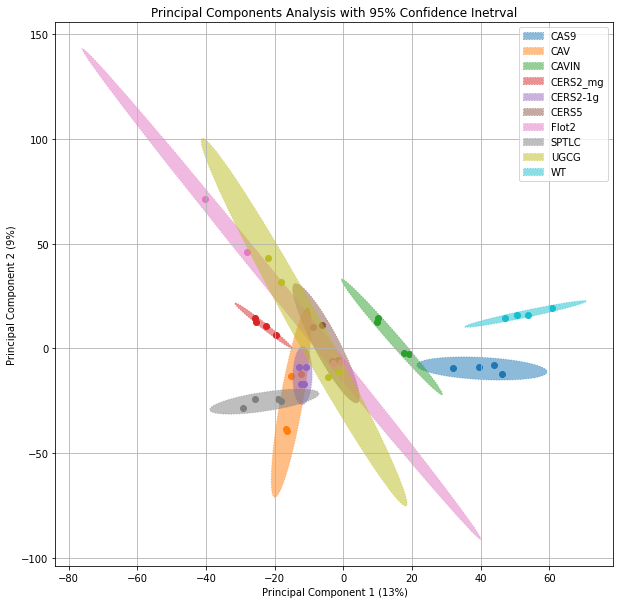

In [26]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(10,10 ))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

In [ ]:
def confidence_ellipse_2(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    return ellipse

In [ ]:
fig,ax=plt.subplots(figsize=(1,1))
plt.scatter(x,y)
ell = confidence_ellipse(x, y, ax)
ax.add_patch(ell)

# Save Chart

In [24]:
# save chart to html
# pca.save('graphs/pos_mode_whole_dataset/pca-transposed.html')